Feb 13 2019 Class

S3_ss 8.626283721240081e-05


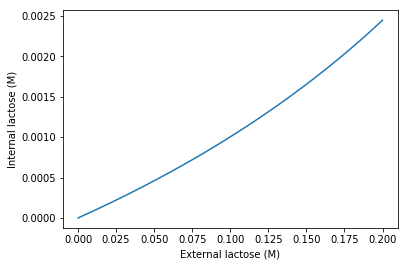

In [78]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tellurium as te
# this is our calculation to check our numerical calculations
# 1 liter = 1 dm^3
area = 1.0e-10; # dm^2
permeability = 1.0e-8; # dm s-1
km = 5.5e-3; # M
S1 = np.linspace(0.0001,.2,1000); # M
kcat = 6.42e2; # s-1
etot = 1.0e-6; # M
vol_cell = 1.0e-15; # L or dm^3
a = area * permeability;
b = km*area*permeability-area*permeability*S1+kcat*etot*vol_cell;
c = -1*km*area*permeability*S1;
S3_ss=(-b+(b**2-4*a*c)**0.5)/(2*a);
#print(a,b,c)
#print('S3_ss',S3_ss)
plt.plot(S1,S3_ss)
plt.ylabel('Internal lactose (M)')
plt.xlabel('External lactose (M)')

S1 = 10e-3; #M
a = area * permeability;
b = km*area*permeability-area*permeability*S1+kcat*etot*vol_cell;
c = -1*km*area*permeability*S1;
S3_ss=(-b+(b**2-4*a*c)**0.5)/(2*a);
print('S3_ss',S3_ss)

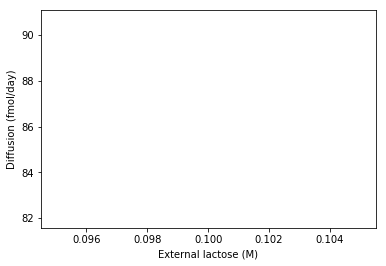

In [44]:
J_ss1=area*permeability*(S1-S3_ss)*(60*60*24)*10e15;#fmol/day
#print('J_ss1',J_ss1)
J_ss2=(kcat*etot*vol_cell*S3_ss)/(km+S3_ss)*(60*60*24)*10e15; #fmol/day
#print('J_ss2',J_ss2)
plt.plot(S1,J_ss1)
plt.xlabel('External lactose (M)')
plt.ylabel('Diffusion (fmol/day)')


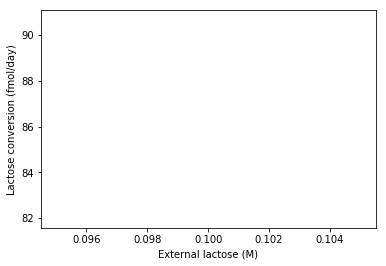

In [45]:
plt.plot(S1,J_ss2)
plt.xlabel('External lactose (M)')
plt.ylabel('Lactose conversion (fmol/day)')

In [113]:
model LacPath
    compartment cytoplasm;
    cytoplasm = 1.0e-6;
    compartment environment;
    environment = 1.0;
    species lactose, glucgalac;
    const species ex_lactose;
    unit M = mole / liter
    unit inv_sec = 1. / seconds
    unit um = 10.e-6 meters
    unit vol_conv = 1000 liter/1 meter^3
    unit dm = 0.01 meters

    lactose = 0.0; # M; free parameter
    glucgalac = 0.0;
    ex_lactose = 10e-3;

    lactose in cytoplasm; glucgalac in cytoplasm;
    ex_lactose in environment;

    J34: lactose -> ; kcat*Etot*vol_cell*lactose/(Km+lactose);

    kcat = 6.42e2; #s^-1; from Juers et al (2012)
    Etot = 1e-6; # M; free parameter
    Km = 5.5e-3; # M; from BRENDA
    vol_cell = 1.0e-15; # L or dm^3

    J13: ex_lactose => lactose; surf_area*permeability*(ex_lactose-lactose);
    #J31: lactose => ex_lactose; surf_area*permeability*(lactose-ex_lactose)*conversion;

    surf_area = 1.0e-10; # dm^2
    permeability = 1.0e-8; # dm s-1
    #conversion = 1 vol_conv;
end

Success: Model can be accessed via variable LacPath


In [114]:
LacPath.reset()
LacPath.simulate(0., 10e10, 1000,['time','[lactose]']) #'S1','J1'
LacPath.plot()

LacPath.steadyStateSelections = ['[lactose]','J34','J13']
values = LacPath.getSteadyStateValues()
selections = LacPath.steadyStateSelections
print(values)
print(selections)

[  8.62628097e-05   9.91373405e-21   9.91373719e-21]
['[lactose]', 'J34', 'J13']
